In [1]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

In [5]:
#  3. Convert the June temperatures to a list.
june_temps_list = list(np.ravel(results))

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps_list, columns=['June Temps'])
june_temps_df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = session.query(Measurement.tobs).filter(extract('month',Measurement.date)==12).all()

In [9]:
# 7. Convert the December temperatures to a list.
dec_temps_list=list(np.ravel(results))

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df=pd.DataFrame(dec_temps_list, columns=['December Temps'])
dec_temps_df

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [12]:
# Merge Summary Statistics of June and December Temperatures 
temps_summary_df = pd.merge(june_temps_df.describe(), dec_temps_df.describe(), left_index=True, right_index=True)
temps_summary_df

,June Temps,December Temps
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


ModeResult(mode=array([[76.]]), count=array([[194]]))

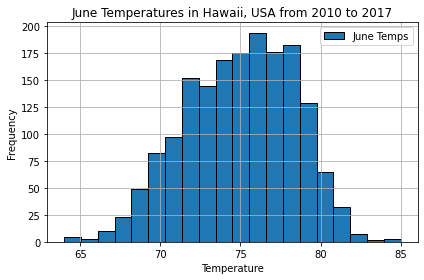

In [13]:
# Create a histogram for June Temperatures
june_temps_df.plot.hist(bins=20, edgecolor='black')
plt.title('June Temperatures in Hawaii, USA from 2010 to 2017')
plt.xlabel('Temperature')
plt.tight_layout()
plt.grid()
sts.mode(june_temps_df)

ModeResult(mode=array([[71.]]), count=array([[174]]))

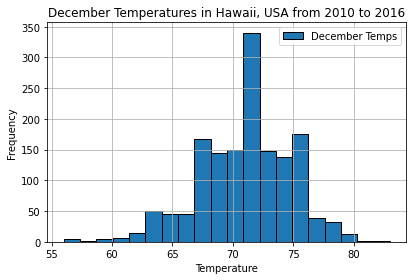

In [14]:
# Create a histogram for December Temperatures
dec_temps_df.plot.hist(bins=20, edgecolor='black')
plt.title('December Temperatures in Hawaii, USA from 2010 to 2016')
plt.xlabel('Temperature')
plt.tight_layout()
plt.grid()
sts.mode(dec_temps_df)

# Additional Queries for Deliverable 3 

In [15]:
# Query the June Precipitation, Put it into a DataFrame and Get summary statistics
results = session.query(Measurement.prcp).filter(extract('month',Measurement.date)==6).all()
june_prcp_list=list(np.ravel(results))
june_prcp_df=pd.DataFrame(june_prcp_list, columns=['June Precipitation'])
june_prcp_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [16]:
# Query the December Precipitation, Put it into a DataFrame and Get summary statistics
results = session.query(Measurement.prcp).filter(extract('month',Measurement.date)==12).all()
dec_prcp_list=list(np.ravel(results))
dec_prcp_df=pd.DataFrame(dec_prcp_list, columns=['December Precipitation'])
dec_prcp_df.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [17]:
# Merge Summary Statistics of June and December Precipitation 
prcp_summary_df = pd.merge(june_prcp_df.describe(), dec_prcp_df.describe(), left_index=True, right_index=True)
prcp_summary_df

,June Precipitation,December Precipitation
count,1574.000000,1405.000000
mean,0.136360,0.216819
std,0.335731,0.541399
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.020000,0.030000
75%,0.120000,0.150000
max,4.430000,6.420000
